## MUHAMMAD TARMIDZI BARIQ - 51422161 - 3IA11

## Study Case 1 : Klasifikasi CNN menggunakan Dataset Fashion MNIST

Dalam study case kali ini, kita akan mempelajarai klasifikasi jenis pakaian menggunakan dataset fashion MNIST

### Import Library yang dibutuhkan

In [4]:
# Mengimpor library yang diperlukan
import os  # Modul untuk interaksi dengan sistem operasi
import pandas as pd  # Modul untuk manipulasi data menggunakan DataFrame
import numpy as np  # Modul untuk operasi numerik
import warnings  # Modul untuk mengabaikan peringatan yang tidak diperlukan

# Mengabaikan peringatan untuk tampilan yang lebih bersih
warnings.filterwarnings('ignore')

# Mengimpor matplotlib untuk visualisasi data
import matplotlib.pyplot as plt

# Mengimpor train_test_split dari scikit-learn untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split

# Mengimpor library Keras untuk membangun model jaringan saraf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam,RMSprop

from tensorflow.keras.callbacks import EarlyStopping

# Menetapkan jumlah kelas dan epoch
num_classes = 10
epochs = 20


### Load Data

In [5]:
!gdown https://drive.google.com/uc?id=117kXP8oiKfxAYO7IZbf6ufZeUMFl0QQM

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# unzip file dataset yang berisi file train dan test
!unzip fashion-mnist.zip

Archive:  fashion-mnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  


### Read Data

In [4]:
# mengisi setiap variable train dan test dengan file csv yang telah dibacakan, sep ="," berguna untuk menghilangkan separator koma
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [5]:
# Membaca header dataset
train_df.head(7)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head(7)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing

In [7]:
# Mengonversi data pelatihan dan pengujian menjadi array numpy dengan tipe data float32
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')


In [8]:
# Normalisasi dan pemisahan fitur dan label untuk data pelatihan
x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

# Normalisasi dan pemisahan fitur dan label untuk data pengujian
x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]


In [9]:
# Pembagian data pelatihan menjadi data pelatihan dan validasi
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.4, random_state=12345)


### Data Visualization

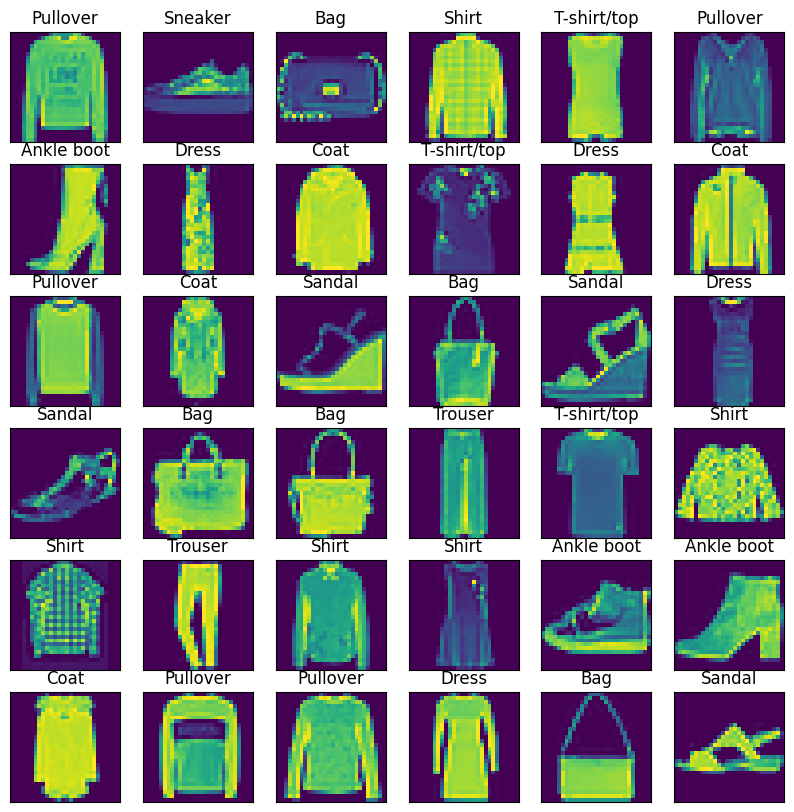

In [10]:
# Menentukan nama kelas untuk digunakan dalam label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Membuat plot dengan ukuran 10x10
plt.figure(figsize=(10, 10))

# Menampilkan 36 sampel gambar dari kelas pelatihan dengan label yang sesuai
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Menampilkan gambar dan menyesuaikan label sesuai dengan indeks kelas
    plt.imshow(x_train[i].reshape((28, 28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])

# Menampilkan plot
plt.show()


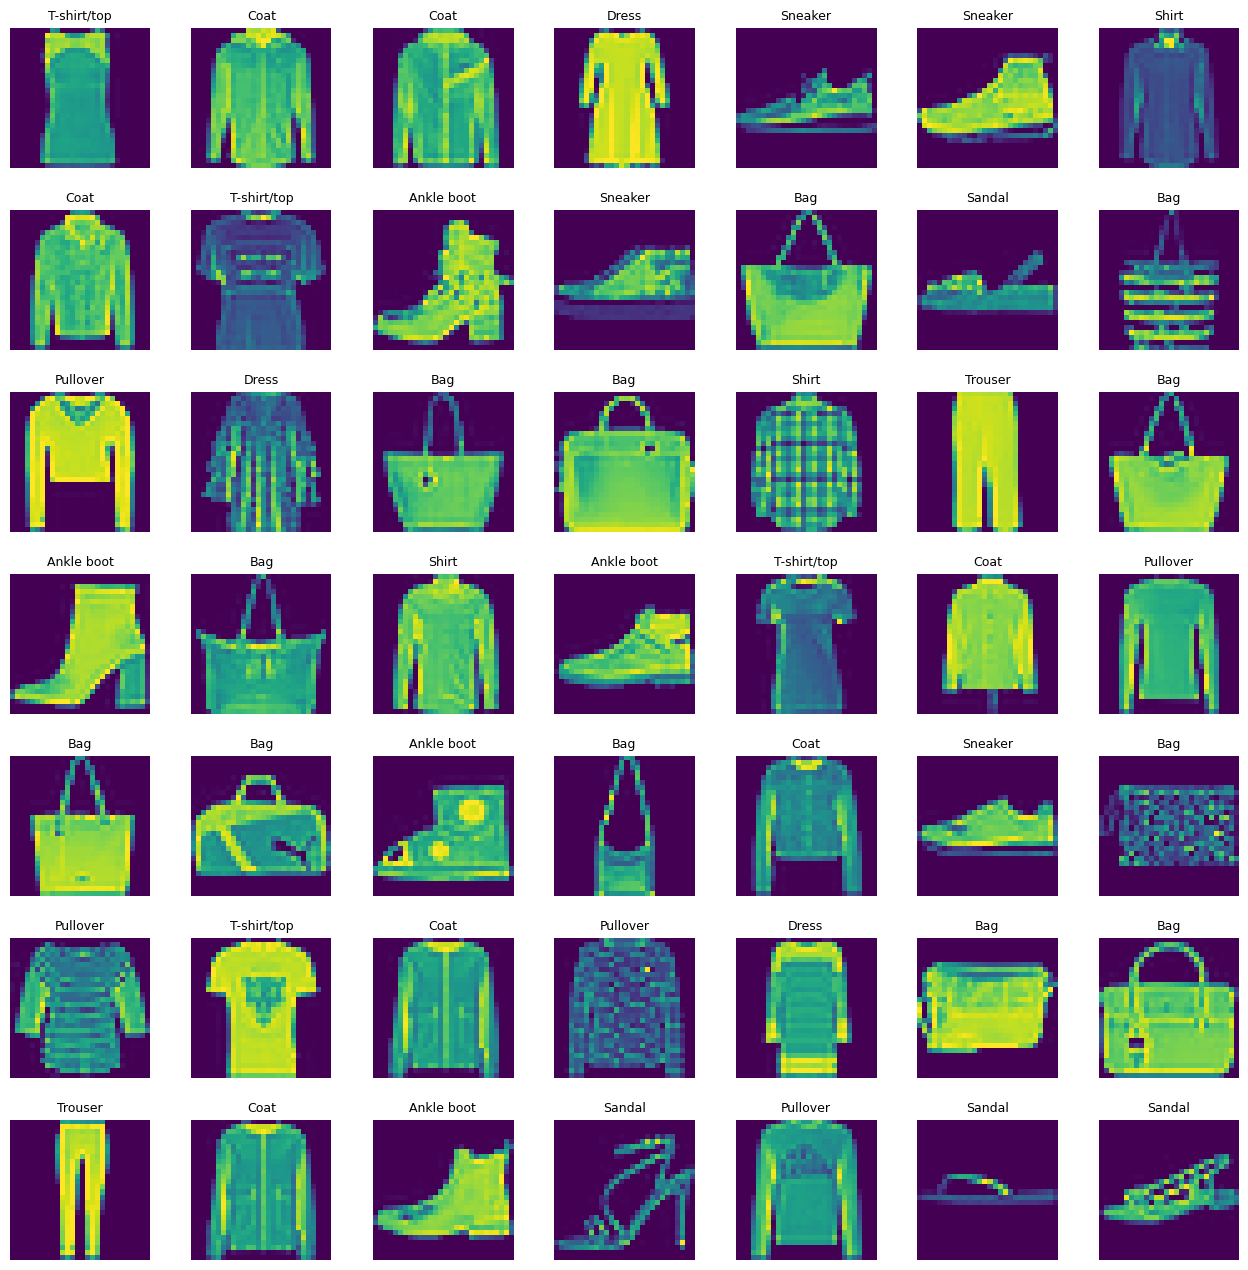

In [11]:
# Menentukan jumlah grid baris dan kolom untuk plot
W_grid = 7
L_grid = 7

# Membuat subplots dengan ukuran sesuai dan meratakan matriks 7x7 menjadi array 1 dimensi
fig, axes = plt.subplots(L_grid, W_grid, figsize=(16, 16))
axes = axes.ravel()  # Meratakan matriks 7x7 menjadi array 1 dimensi
n_train = len(train_data)  # Mendapatkan panjang data pelatihan

# Memilih angka acak dari 0 hingga n_train
for i in np.arange(0, W_grid * L_grid):  # Membuat variabel dengan jarak yang merata

    # Memilih angka acak
    index = np.random.randint(0, n_train)
    # Membaca dan menampilkan gambar dengan indeks yang dipilih
    axes[i].imshow(train_data[index, 1:].reshape((28, 28)))
    label_index = int(train_data[index, 0])
    axes[i].set_title(class_names[label_index], fontsize=9)
    axes[i].axis('off')

# Menyesuaikan ruang antar subplot secara vertikal
plt.subplots_adjust(hspace=0.3)

### Modelling

In [ ]:
# Menentukan ukuran baris dan kolom gambar, ukuran batch, dan bentuk gambar
image_rows = 28
image_cols = 28
batch_size = 64
image_shape = (image_rows, image_cols, 1)

In [ ]:
# Mengubah bentuk gambar pada set pelatihan, pengujian, dan validasi
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

In [ ]:
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', x_validate.shape)
print('y_validation:', y_validate.shape)

In [ ]:
# Membangun model Convolutional Neural Network (CNN)
# Layer konvolusi pertama dengan 32 filter, kernel size 3x3, dan fungsi aktivasi ReLU
# Input shape sesuai dengan dimensi gambar yang digunakan (28x28 piksel, 1 channel)
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape),
    # Layer pooling untuk mengecilkan dimensi output menjadi 14x14
    MaxPooling2D(pool_size=2),
    # Dropout layer untuk menghindari overfitting
    Dropout(0.2),
    # Flatten layer untuk menyapu (flatten) output menjadi vektor 1 dimensi
    Flatten(),
    # Dense layer dengan 32 unit dan fungsi aktivasi ReLU
    Dense(32, activation='relu'),
    # Dense layer output dengan 10 unit (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
    Dense(10, activation='softmax')
])


In [ ]:
# Mengkompilasi model CNN dengan menggunakan sparse categorical crossentropy sebagai fungsi kerugian,
# Adam optimizer dengan learning rate 0.001, dan metrik akurasi
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy'])

In [ ]:
# Melatih model CNN menggunakan data latih (x_train, y_train) dengan batch size 4096, selama 75 epoch,
# dengan data validasi (x_validate, y_validate)

# Callback EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=10,
    verbose=1,
    validation_data=(x_validate, y_validate),
    # callbacks=[early_stopping]
)
# Melatih model Convolutional Neural Network (CNN) menggunakan fungsi fit().
# x_train: data gambar latih
# y_train: label gambar latih
# batch_size: jumlah sampel per pembaharuan gradien
# epochs: jumlah iterasi pada data latih
# verbose: menampilkan progres latihan (1 untuk tampil, 0 untuk tidak)
# validation_data: data yang digunakan untuk validasi selama pelatihan

In [ ]:
# Menampilkan grafik kurva loss function dan akurasi pada data latih dan validasi
# untuk memonitor performa pelatihan model CNN.
plt.figure(figsize=(10, 10))

# subplot(2, 2, 1): Menampilkan grafik kurva loss function (training dan validation).
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

# subplot(2, 2, 2): Menampilkan grafik kurva akurasi (training dan validation).
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:

# Mengambil nilai akurasi dan loss dari history model
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plotting grafik akurasi
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

# Plotting grafik loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Mendapatkan prediksi untuk data uji
predicted_probabilities = cnn_model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Mengonversi y_true menjadi array NumPy untuk penanganan yang konsisten
y_true = np.array(test_df.iloc[:, 0])

# Kode lainnya tetap sama
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

# Melakukan import classification_report dari sklearn.metrics
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]

# Menampilkan laporan klasifikasi
print(classification_report(y_true, predicted_classes, target_names=target_names))

In [ ]:
# Labels untuk kelas
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Mengatur baris dan kolom untuk tampilan gambar
L = 5
W = 5

# Membuat subplot
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

# Menampilkan gambar dan prediksi
for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='inferno')  # Asumsi gambar berwarna abu-abu
    axes[i].set_title(f"Prediksi: {labels[predicted_classes[i]]}\nAsli: {labels[y_test[i]]}")
    axes[i].axis('off')

# Mengatur jarak antar subplot
plt.subplots_adjust(wspace=0.5)
plt.show()

## Study Case : Klasifikasi CNN dengan menggunakan dataset MNIST

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

In [7]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [8]:
!pip install gdown

In [9]:
!gdown https://drive.google.com/uc?id=1X5aQ0d-o3BDdVMOsScD-DwkPqFuAptj_
!gdown https://drive.google.com/uc?id=1xl8AkS0IRegqCmUIFoXoM74bT5AD2IIy

Downloading...
From: https://drive.google.com/uc?id=1X5aQ0d-o3BDdVMOsScD-DwkPqFuAptj_
To: C:\Users\ASUS\Documents\KULIAH-SEMESTER-5\Kecerdasan Artificial\PERTEMUAN2\test.csv

  0%|          | 0.00/51.1M [00:00<?, ?B/s]
  1%|1         | 524k/51.1M [00:00<00:11, 4.31MB/s]
  2%|2         | 1.05M/51.1M [00:00<00:12, 4.17MB/s]
  3%|3         | 1.57M/51.1M [00:00<00:11, 4.32MB/s]
  4%|4         | 2.10M/51.1M [00:00<00:11, 4.42MB/s]
  5%|5         | 2.62M/51.1M [00:00<00:11, 4.11MB/s]
  6%|6         | 3.15M/51.1M [00:00<00:12, 3.86MB/s]
  7%|7         | 3.67M/51.1M [00:00<00:12, 3.84MB/s]
  8%|8         | 4.19M/51.1M [00:01<00:12, 3.78MB/s]
  9%|9         | 4.72M/51.1M [00:01<00:12, 3.66MB/s]
 10%|#         | 5.24M/51.1M [00:01<00:12, 3.66MB/s]
 11%|#1        | 5.77M/51.1M [00:01<00:12, 3.65MB/s]
 12%|#2        | 6.29M/51.1M [00:01<00:12, 3.66MB/s]
 13%|#3        | 6.82M/51.1M [00:01<00:12, 3.63MB/s]
 14%|#4        | 7.34M/51.1M [00:01<00:12, 3.51MB/s]
 15%|#5        | 7.86M/51.1M [00:02<00:1

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print('train:', train.shape)
print('test:', test.shape)
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]
X_test = test.iloc[:, 0:784]

train: (42000, 785)
test: (28000, 784)


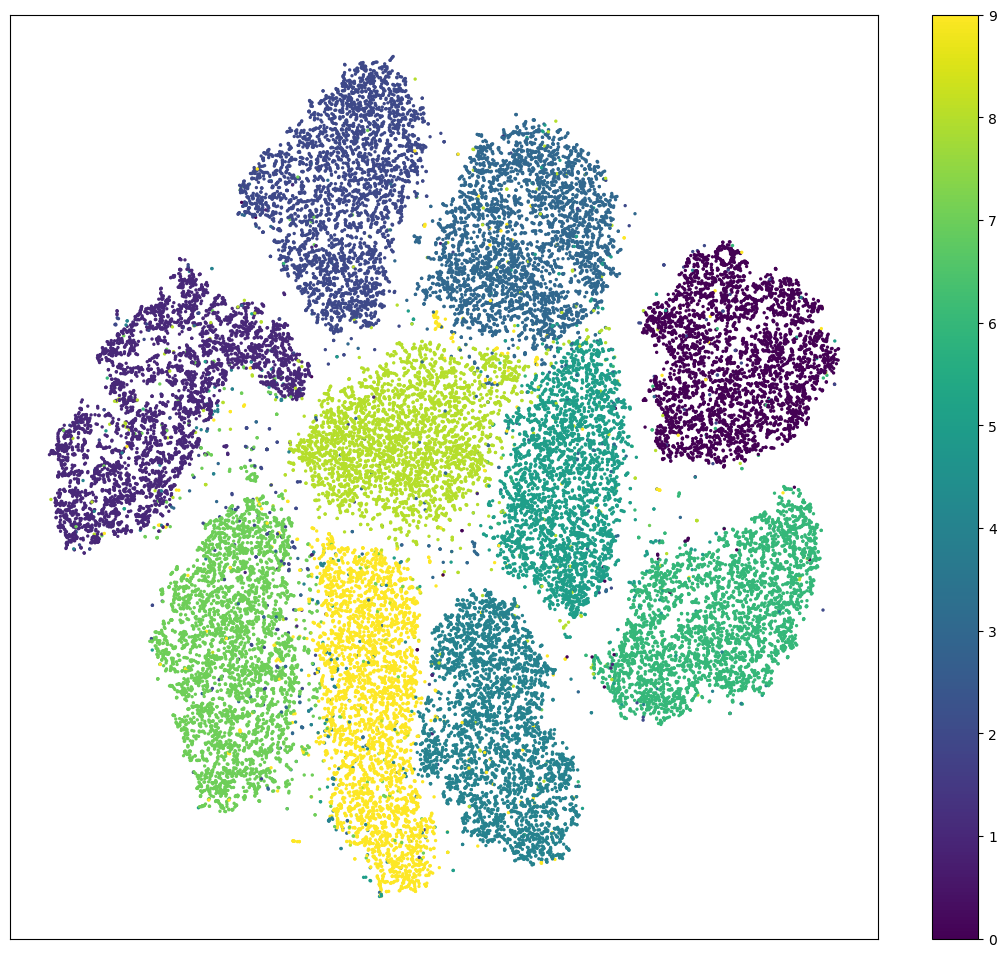

In [16]:
# WARNING: running t-SNE on the full data set takes a while.
X_tsn = X/255
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_res = tsne.fit_transform(X_tsn)
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

In [18]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [19]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [20]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [21]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


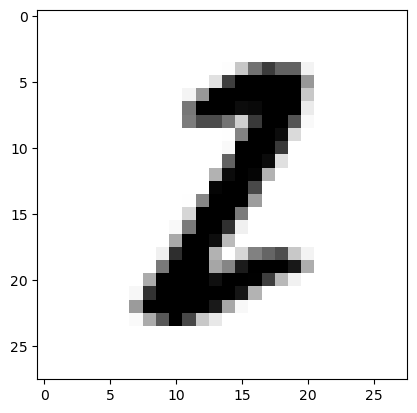

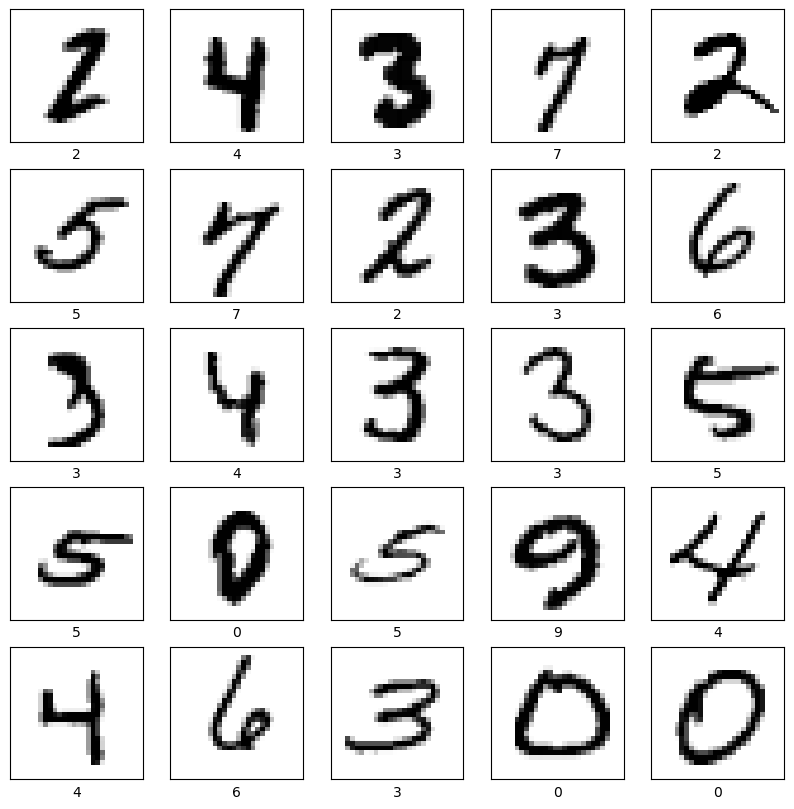

In [22]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()
# Let's print some more training examples to get the feeling of how the digits were written.
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [23]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [24]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [27]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']

)

In [29]:
log_dir="/mnt/MyDrive/datasets/"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)
print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 51s 48ms/step - loss: 0.2688 - accuracy: 0.9182 - val_loss: 0.0981 - val_accuracy: 0.9707
Epoch 2/10
1050/1050 [==============================] - 58s 55ms/step - loss: 0.0934 - accuracy: 0.9711 - val_loss: 0.0674 - val_accuracy: 0.9800
Epoch 3/10
1050/1050 [==============================] - 52s 49ms/step - loss: 0.0676 - accuracy: 0.9790 - val_loss: 0.0585 - val_accuracy: 0.9826
Epoch 4/10
1050/1050 [==============================] - 52s 49ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0564 - val_accuracy: 0.9819
Epoch 5/10
1050/1050 [==============================] - 54s 51ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0751 - val_accuracy: 0.9776
Epoch 6/10
1050/1050 [==============================] - 46s 44ms/step - loss: 0.0372 - accuracy: 0.9877 - val_loss: 0.0559 - val_accuracy: 0.9842
Epoch 7/10
1050/1050 [==============================] - 46s 44ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0496 -

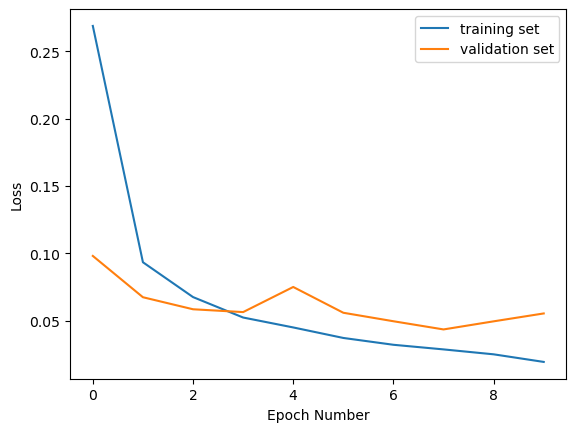

In [30]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

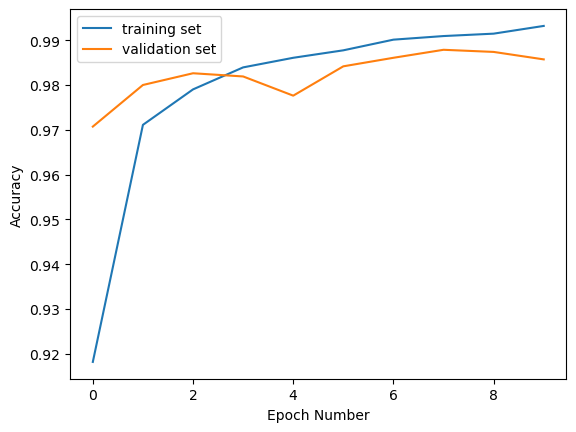

In [31]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [32]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

1050/1050 [==============================] - 3s 3ms/step - loss: 0.0124 - accuracy: 0.9954
Train loss:  0.012431105598807335
Train accuracy:  0.9954464435577393


In [33]:
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

263/263 [==============================] - 1s 2ms/step - loss: 0.0554 - accuracy: 0.9857
Validation loss:  0.05541245639324188
Validation accuracy:  0.9857142567634583


In [34]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')
loaded_model = tf.keras.models.load_model(model_name)

263/263 [==============================] - 1s 2ms/step


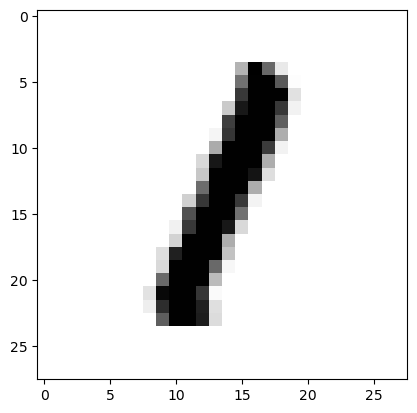

In [35]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)
# Show the predicted image
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

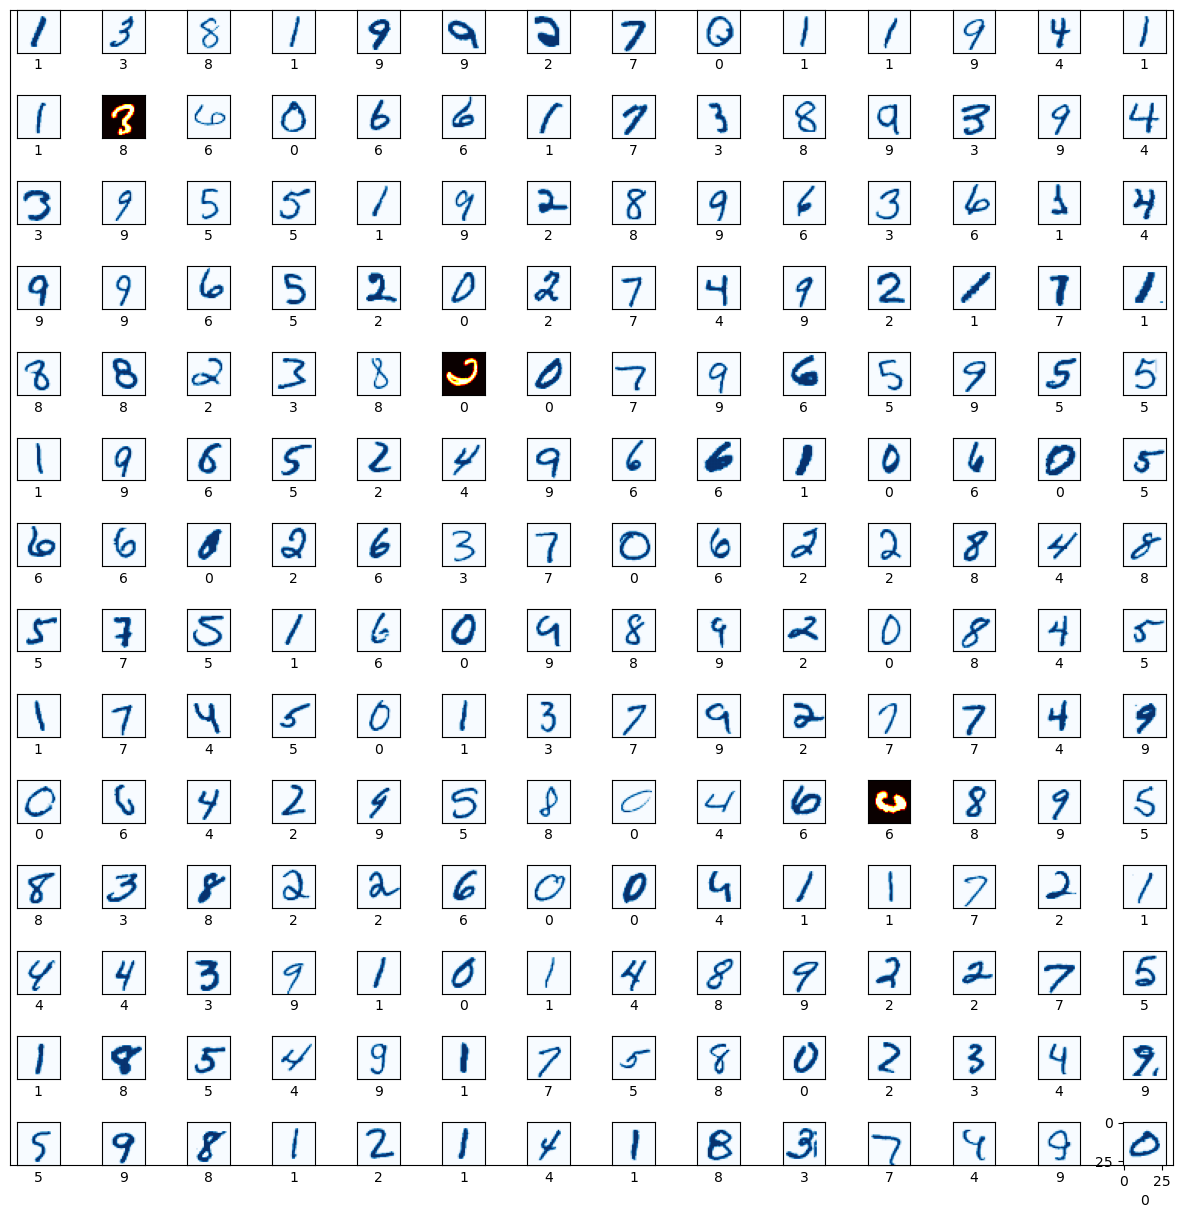

In [36]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))
for plot_index in range(numbers_to_display):
 predicted_label = predictions[plot_index]
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 color_map = 'Blues' if predicted_label == y_validation_re[plot_index] else 'hot'
 plt.subplot(num_cells, num_cells, plot_index + 1)
 plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
 plt.xlabel(predicted_label)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

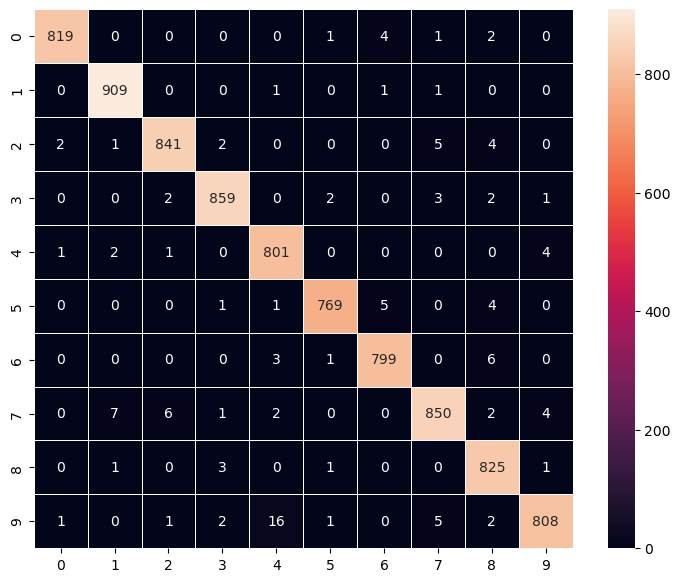

In [37]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [38]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1
test_pred.head()

875/875 [==============================] - 2s 2ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
